Observations summary: 
The data contains a total of 249 mouses, approximately 51% are males and 49% are females. Out of the 249 mouses, one ('g989') was excluded from the final analysis due to duplication of timepoints. Of the 10 treatment groups, Capomulin and Ramicane had the smallest average tumor volume with standard deviation of 4.99 and 4.84, respectively. There is strong positive correlation between the average tumor volume and weight for the Capomulin treatment group.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


In [25]:

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [26]:

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [27]:

# Combine the data into a single DataFrame
data_merged = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
data_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [28]:
# Checking the number of mice.
mouse_count =data_merged["Mouse ID"].nunique()
mouse_count


249

In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data =data_merged.duplicated(subset=["Mouse ID", "Timepoint"], keep=False )
duplicate_rows =data_merged[duplicate_data]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_merged_clean =pd.DataFrame(data_merged.loc[data_merged['Mouse ID'] !="g989", :])
data_merged_clean


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [31]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean_count =data_merged_clean["Mouse ID"].nunique()
mouse_count_clean_count

248

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_clean_group = data_merged_clean.groupby(['Drug Regimen'])
mouse_tumor_mean = mouse_clean_group['Tumor Volume (mm3)'].mean()
mouse_tumor_median = mouse_clean_group['Tumor Volume (mm3)'].median()
mouse_tumor_var = mouse_clean_group['Tumor Volume (mm3)'].var()
mouse_tumor_std = mouse_clean_group['Tumor Volume (mm3)'].std()
mouse_tumor_sem = mouse_clean_group['Tumor Volume (mm3)'].sem()

pd.DataFrame(mouse_tumor_mean)
tumor_mean = mouse_tumor_mean.rename('Mean Tumor Volume')
pd.DataFrame(tumor_mean)

pd.DataFrame(mouse_tumor_median)
tumor_median = mouse_tumor_median.rename('Median Tumor Volume')
pd.DataFrame(tumor_median)

pd.DataFrame(mouse_tumor_var)
tumor_var = mouse_tumor_var.rename('Tumor Volume Variance')
pd.DataFrame(tumor_var)

pd.DataFrame(mouse_tumor_std)
tumor_std = mouse_tumor_std.rename('Tumor Volume Std. Dev.')
pd.DataFrame(tumor_std)

pd.DataFrame(mouse_tumor_sem)
tumor_sem = mouse_tumor_sem.rename('Tumor Volume Std. Err.')
pd.DataFrame(tumor_sem)

merge_m_m = pd.merge(tumor_mean, tumor_median, on="Drug Regimen")
merge_m_m_v =pd.merge(merge_m_m, tumor_var, on="Drug Regimen")
merge_m_m_v_s = pd.merge(merge_m_m_v, tumor_std, on="Drug Regimen")
summary_stats =pd.merge(merge_m_m_v_s, tumor_sem, on="Drug Regimen")
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0.5, 1.0, 'Drug Regimen vs Number of Observed Mouse Timepoints')

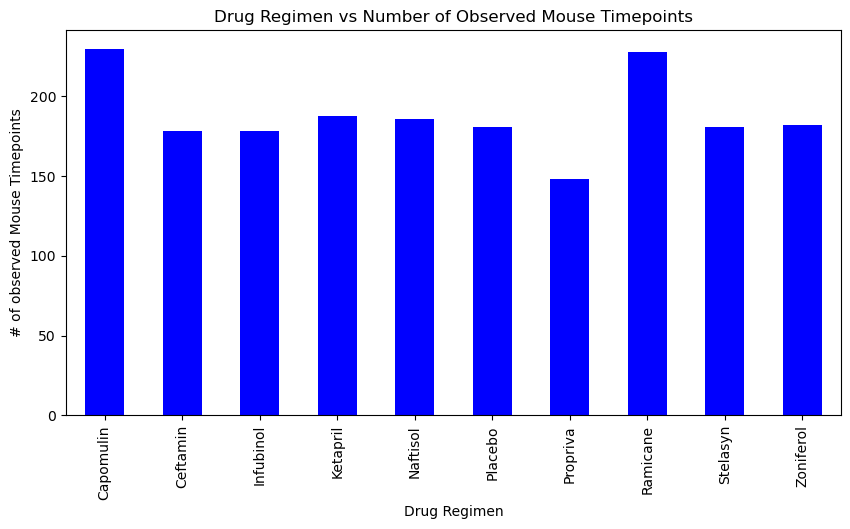

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timestamp_drug = data_merged_clean.groupby('Drug Regimen')
timestamp_drug_count = timestamp_drug.count()
timestamp_drug_series =timestamp_drug_count['Mouse ID']
timestamp_drug_series.plot(kind='bar', color='b', figsize=(10,5))
plt.ylabel("# of observed Mouse Timepoints")
plt.title("Drug Regimen vs Number of Observed Mouse Timepoints")

Text(0.5, 1.0, 'Drug Regimen vs Number of Observed Mouse Timepoints')

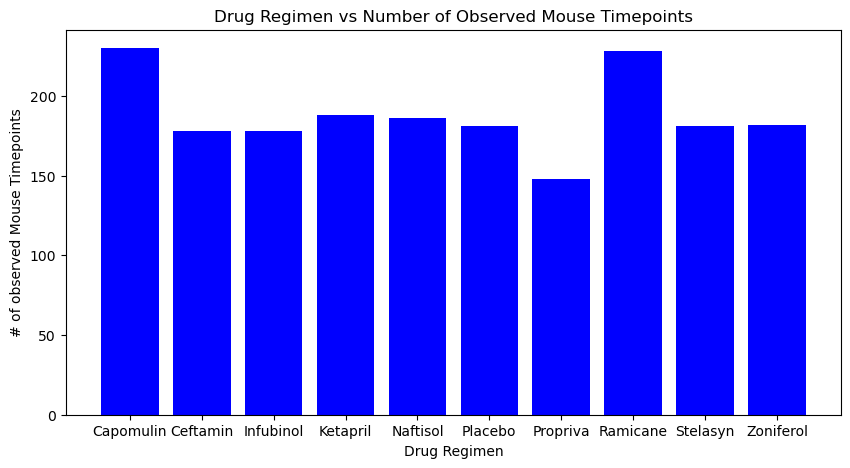

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_names = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva', 'Ramicane','Stelasyn','Zoniferol']
Mouse_ID_total = [230, 178, 178,188,186,181,148,228,181,182]
plt.figure(figsize=(10,5))
plt.bar(drug_names,Mouse_ID_total, color ='b', align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.title("Drug Regimen vs Number of Observed Mouse Timepoints")

Text(0, 0.5, 'Sex')

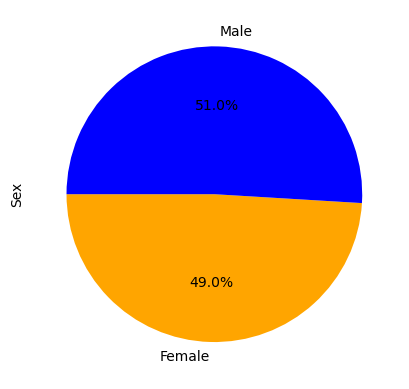

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_merged_gender = data_merged_clean.groupby('Sex')
gender_count = data_merged_gender.count()
gender_series = gender_count['Mouse ID']
colors = ["orange", "blue"]
gender_pie =gender_series.plot(kind="pie", autopct ='%1.1f%%', colors =colors, startangle = 180)
gender_pie.set_ylabel('Sex')



(-1.0999999216031002,
 1.0999999962668143,
 -1.0999998983502923,
 1.0999999824223206)

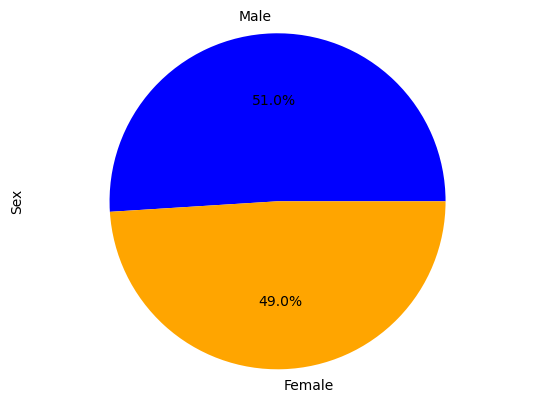

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
percentages =[51, 49]
colors =["blue", "orange"]
plt.pie(percentages,labels =labels, colors=colors, autopct ="%1.1f%%")
plt.ylabel("Sex")
plt.axis('equal')



In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
treatments =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []
for drug in treatments:
    drug_data = data_merged_clean[data_merged_clean['Drug Regimen'] == drug]
    final_timepoint =drug_data.groupby('Mouse ID')['Timepoint'].max()
    final_volume =pd.DataFrame(final_timepoint)
    final_volume = pd.merge(final_volume, data_merged_clean, on=('Mouse ID', 'Timepoint'))
    final_tumor_vol.append(final_volume['Tumor Volume (mm3)'])

<bound method DataFrame.count of    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a275         45           62.999356                 3     Ceftamin   
1      b447          0           45.000000                 0     Ceftamin   
2      b487         25           56.057749                 1     Ceftamin   
3      b759         30           55.742829                 1     Ceftamin   
4      f436         15           48.722078                 2     Ceftamin   
5      h531          5           47.784682                 0     Ceftamin   
6      j296         45           61.849023                 3     Ceftamin   
7      k210         45           68.923185                 3     Ceftamin   
8      l471         45           67.748662                 1     Ceftamin   
9      l490         30           57.918381                 3     Ceftamin   
10     l558         10           46.784535                 0     Ceftamin   
11     l661         45           59.851956 

In [ ]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

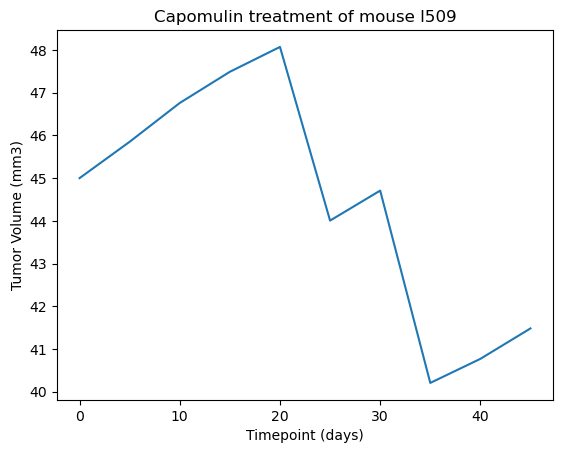

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
data_l509 = data_merged_clean.loc[(data_merged_clean['Mouse ID'] == "l509") & (data_merged_clean['Drug Regimen'] == "Capomulin"), :]
x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
y_axis = [45.000000, 45.851193, 46.759074, 47.488599,48.070452, 44.006257, 44.708055, 40.207288, 40.770813, 41.483008]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

C:\Users\jenny\AppData\Local\Temp\ipykernel_252\2026928818.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_tumor_ave = data_capomulin_group.mean()


<Axes: title={'center': 'Mouse Weight vs. Average Observed Tumor Volume for Mouse treated with Capomulin'}, xlabel='Weight (g)', ylabel='Average Tumor Volume(mm3)'>

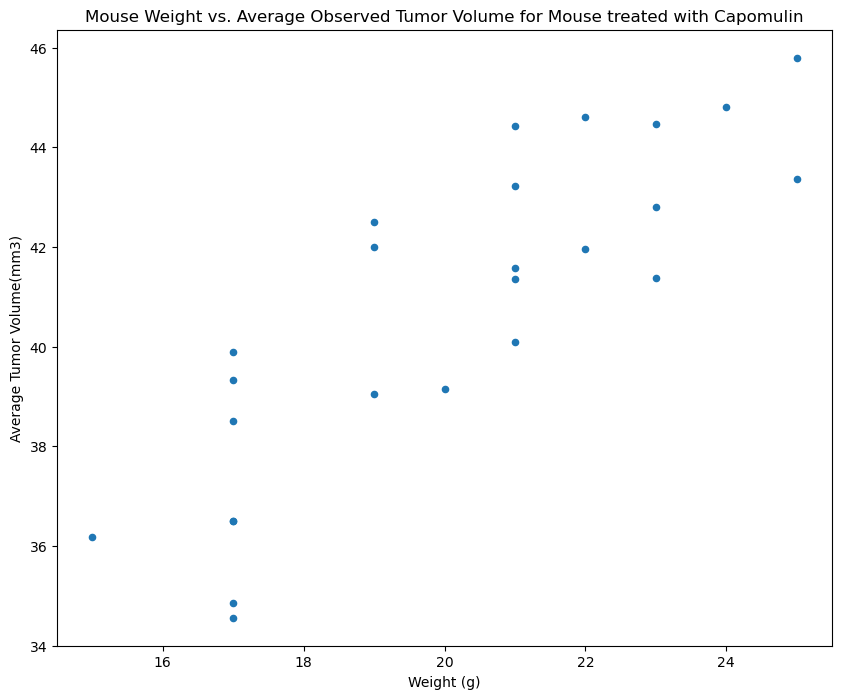

In [41]:
#Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data_capomulin_df = data_merged_clean[['Mouse ID','Tumor Volume (mm3)','Weight (g)','Drug Regimen']]
data_capomulin_only = data_capomulin_df.loc[(data_capomulin_df['Drug Regimen'] == "Capomulin"), :]
data_capomulin_group =data_capomulin_only.groupby ('Mouse ID')
capomulin_tumor_ave = data_capomulin_group.mean()
tumor_ave = capomulin_tumor_ave.rename(columns ={"Tumor Volume (mm3)":"Average Tumor Volume(mm3)"})
tumor_ave.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume(mm3)", figsize=(10,8),
              title="Mouse Weight vs. Average Observed Tumor Volume for Mouse treated with Capomulin")

The r-squared is: 0.7088568047708723


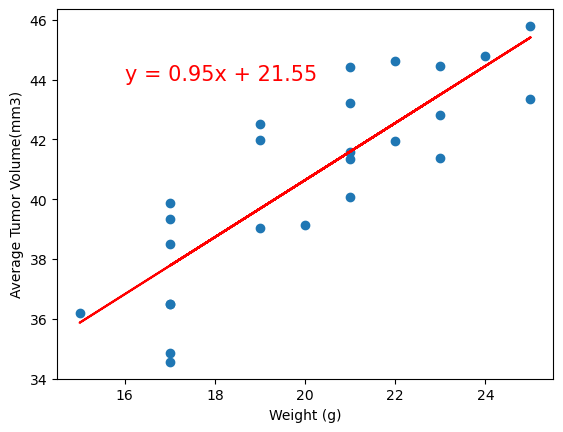

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = tumor_ave['Weight (g)']
y_values = tumor_ave['Average Tumor Volume(mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
